**Notebook Model Support Vector Machine (SVM)**

Notebook ini berisi langkah-langkah pembuatan model Support Vector Machine (SVM) untuk melakukan deteksi dini terhadap karies gigi menggunakan sensor AS7262. Data yang digunakan merupakan intensitas cahaya emisi dari campuran sampel saliva pasien dengan larutan kurkumin yang disinari dengan sumber eksitasi LED UV. 

Data pada penelitian ini terdiri dari enam channel panjang gelombang sensor AS7262 dengan panjang gelombang  450, 500, 550, 570, 600 dan 650 nm serta jenis klasifikasinya (sehat dan karies).

Parameter Terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Laporan Klasifikasi:
              precision    recall  f1-score   support

      karies       0.83      0.56      0.67         9
       sehat       0.64      0.88      0.74         8

    accuracy                           0.71        17
   macro avg       0.73      0.72      0.70        17
weighted avg       0.74      0.71      0.70        17



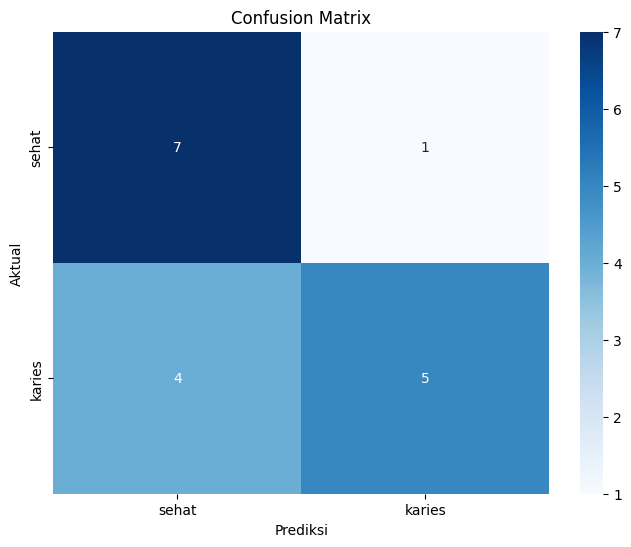

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file CSV
df = pd.read_csv(r'D:\Mine\Kuliah\Tugas_Akhir\Program\Fix\5_Tetes\5tetes_normalisasi_oversampled.csv')
# Memisahkan fitur (X) dan label (y)
X = df[['Ungu', 'Biru', 'Hijau', 'Kuning', 'Oranye', 'Merah']].values
y = df['label'].values
# Mengatur urutan kelas sesuai tingkat keparahan karies
label_order = ['sehat', 'karies']
# Mengubah label menjadi nilai numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)
# Membuat objek klasifikasi SVM
svm_model = SVC()
# Membuat parameter grid untuk mendapatkan parameter terbaik
param_grid = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
# Membuat objek GridSearchCV dengan scoring='accuracy'
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan grid search untuk mencari parameter terbaik
grid_search.fit(X_train, y_train)
# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter Terbaik:", best_params)
# Membuat model SVM dengan parameter terbaik
best_svm_model = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
# Melatih model dengan parameter terbaik menggunakan data latih
best_svm_model.fit(X_train, y_train)

# Memprediksi kelas pada data uji
y_pred = best_svm_model.predict(X_test)

# Mengubah label kembali ke bentuk asli
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)

# Menampilkan classification report
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=label_order)

# Menampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


Bagian ini digunakan untuk menguji model dengan data baru yang tidak ada hubungannya dengan proses pelatihan.

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Membaca data dari file CSV
df = pd.read_csv(r'D:\Mine\Kuliah\Tugas_Akhir\Program\Fix\5_Tetes\5tetes_normalisasi_oversampled.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['Ungu', 'Biru', 'Hijau', 'Kuning', 'Oranye', 'Merah']].values
y = df['label'].values

# Mengatur urutan kelas sesuai tingkat keparahan karies
label_order = ['sehat', 'karies']

# Mengubah label menjadi nilai numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=4, stratify=y)

# Membuat objek klasifikasi SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Melatih model menggunakan data latih
svm_model.fit(X_train, y_train)

# Menerima input dari pengguna untuk fitur-fitur dipisahkan koma
features = input("Masukkan nilai untuk setiap fitur dipisahkan koma: ")
feature_values = features.split(",")

# Memastikan jumlah fitur yang dimasukkan sesuai dengan yang diharapkan
if len(feature_values) != 6:
    print("Jumlah fitur yang dimasukkan tidak sesuai!")
    exit()

# Mengubah nilai fitur menjadi float dan memasukkannya ke dalam array
input_data = [[float(value) for value in feature_values]]

# Normalisasi data input menggunakan MinMaxScaler
input_data_scaled = scaler.transform(input_data)

# Melakukan prediksi menggunakan model
prediction = svm_model.predict(input_data_scaled)

# Mengubah label prediksi menjadi bentuk asli
predicted_class = label_encoder.inverse_transform(prediction)

print("Hasil Prediksi:", predicted_class)
